# Plotting Disaster Data

Disaster data download from EM-DAT public data - https://public.emdat.be/data

In [1]:
# Library import
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Read input .csv file
disasters=pd.read_csv('C:/Users/lukec/OneDrive - University of Cambridge/Projects/GTC/data/emdat_public_meteorological.csv', index_col=0, error_bad_lines=False, warn_bad_lines=True)

In [3]:
disasters.head(5)

,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Dis No,,,,,,,,,,,,,,,,,,,,,
1904-0003-BGD,1904,3,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,OFDA,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
1906-0015-HKG,1906,15,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Kill,Hong Kong,...,8.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,3.5223
1909-0010-BGD,1909,10,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Kill,Bangladesh,...,15.0,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
1909-0013-BGD,1909,13,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,OFDA,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
1909-0012-HTI,1909,12,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Kill,Haiti,...,12.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223


In [59]:
disasters['Disaster Subtype'].unique()
disasters

<bound method Series.notna of Dis No
1904-0003-BGD   NaN
1906-0015-HKG   NaN
1909-0010-BGD   NaN
1909-0013-BGD   NaN
1909-0012-HTI   NaN
                 ..
2020-0308-TWN   NaN
2020-0082-USA   NaN
2020-0219-USA   NaN
2020-0501-VNM   NaN
2020-0132-VUT   NaN
Name: Longitude, Length: 4960, dtype: float64>

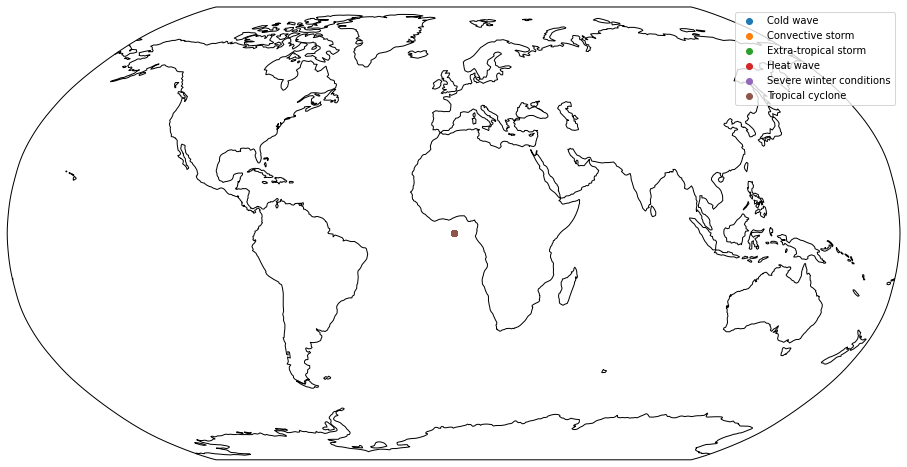

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

groups = disasters.groupby('Disaster Subtype')
ax.set_global()
ax.coastlines()
for name, group in groups:
    ax.scatter(group['Longitude'], group['Latitude'], marker='o', label=name)
ax.legend()

plt.show()

--------------------------------------------------------